# Model With SVM

About the Model

An SVM (Support Vector Machine) is a supervised learning algorithm used for classification and regression tasks. It works by finding the hyperplane that best separates data points from different classes, maximizing the margin between them. SVM can use different kernels (linear, RBF, polynomial) to handle non-linear relationships in the data. The performance is controlled by parameters like C (regularization) and gamma (kernel-specific parameter).

### Importing Libraries for Model Evaluation

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_curve

### Loading the dataset

About the Dataset

The dataset focuses on various attributes of URLs to identify potential phishing attempts. It includes features such as URL length, domain characteristics, security indicators (like HTTPS usage), and content structure metrics. By analyzing these attributes, the dataset aims to differentiate between legitimate and malicious URLs, providing valuable insights for cybersecurity efforts. This information can be crucial for developing models to detect phishing threats effectively.

In [11]:
df = pd.read_csv("Data/Phishing_URL_Dataset.csv")

### Encoding Categorical Features with LabelEncoder

LabelEncoder is used to convert categorical variables into numeric labels, making them suitable for machine learning models. It assigns a unique integer to each category in the feature columns, such as 'Domain', 'TLD', and 'Title'.

In [8]:
encoder = LabelEncoder()
df['Domain'] = encoder.fit_transform(df['Domain'])
df['TLD'] = encoder.fit_transform(df['TLD'])
df['Title'] = encoder.fit_transform(df['Title'])

### Defining Features and Target Variables

The features (X) are defined by selecting all columns except for the target variable, 'label', and non-relevant columns like 'FILENAME' and 'URL'. The target variable (y) is set to the 'label' column, which represents the class for classification.

In [9]:
#Features
X = df.drop(columns=["label","FILENAME","URL"], axis=1)
#Target
y = df["label"]


### Splitting Data into Training and Testing Sets

The dataset is split into training and testing sets to evaluate the model's performance on unseen data. A 70-30 split is used, with 70% for training and 30% for testing, ensuring randomization with a fixed seed for reproducibility.

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (165056, 53)
X_test shape: (70739, 53)
y_train shape: (165056,)
y_test shape: (70739,)


### SVM model creation

The SVM model is created by specifying the kernel type, regularization parameter, and other settings to define the classifier.

In [ ]:
svm_model = SVC(C=0.1, kernel='linear', gamma='scale')

### Optimizing SVM Performance with Grid Search and Cross-Validation

Grid search with SVM involves tuning hyperparameters like C, kernel, and gamma to optimize model performance. It uses cross-validation to find the best parameter combination, maximizing accuracy and ensuring generalization.

In [6]:

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize the SVM model
svm = SVC()

# Set up the grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   3.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.9s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  11.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  12.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  11.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  12.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  12.7s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  10.8s
[CV] END ....................C=0.1, gamma=scale

### Training and Evaluating SVM Model with Optimized Parameters

The SVM model is initialized using the best hyperparameters found through grid search, such as C, kernel, and gamma. The model is then trained on the training data, learning to classify based on the provided features. After training, the model is evaluated on the test set to measure its accuracy and generate a classification report, showing performance metrics like precision, recall, and F1-score.

In [12]:
# Initialize the SVM model with best parameters
svm_model = SVC(C=0.1, kernel='linear', gamma='scale',probability=True)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model

print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy on Test Set: 0.9996324516886017
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30343
           1       1.00      1.00      1.00     40396

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



### Evaluating Model Performance with ROC Curve and AUC

The ROC curve is used to evaluate the classification model's performance by plotting the true positive rate against the false positive rate. The AUC score quantifies the model's ability to distinguish between classes, with a higher value indicating better performance.

ROC AUC: 0.9999724194241306


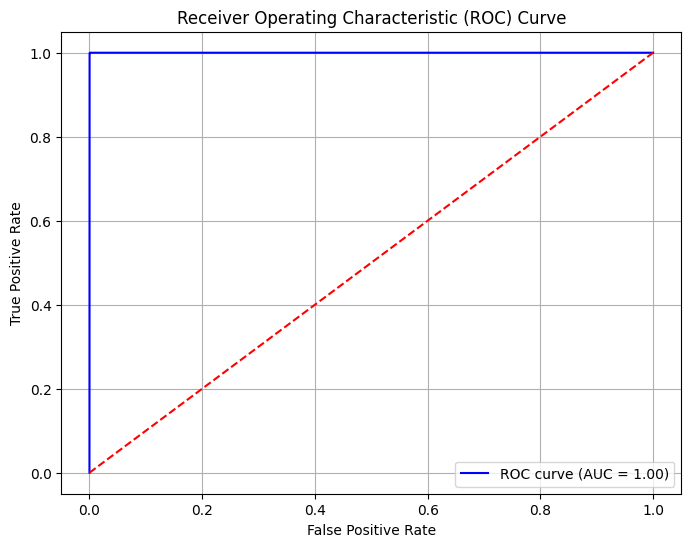

In [13]:
# Predict probabilities for the positive class
y_prob = svm_model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate the ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc_auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Confusion Matrix Heatmap

The confusion matrix heatmap displays the performance of the model.
It shows the distribution of actual vs. predicted values for the two classes: Phishing (0) and Legitimate (1)."
True positives (TP) and true negatives (TN) represent correct predictions, while false positives (FP) and false negatives (FN) represent misclassifications."

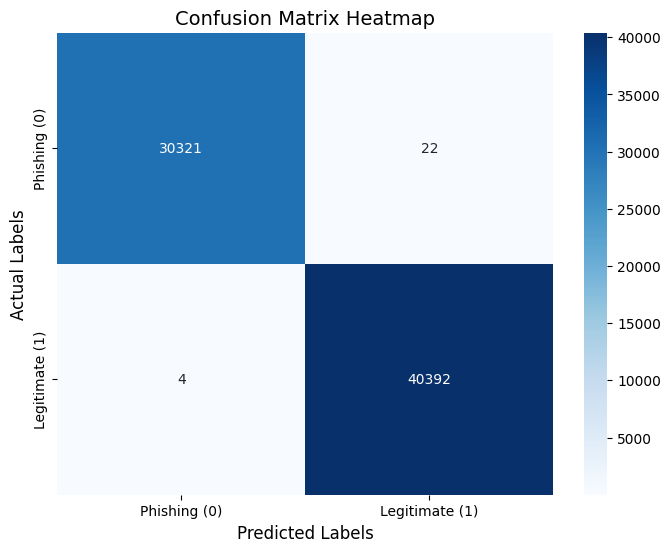

In [21]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Phishing (0)', 'Legitimate (1)']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('Actual Labels', fontsize=12)
plt.title('Confusion Matrix Heatmap', fontsize=14)
plt.show()

### PR Curve (Precision-Recall Curve)

The Precision-Recall curve shows the trade-off between precision and recall for different classification thresholds. It is particularly useful in imbalanced datasets, helping to evaluate the model’s ability to correctly identify phishing URLs while minimizing false positives.

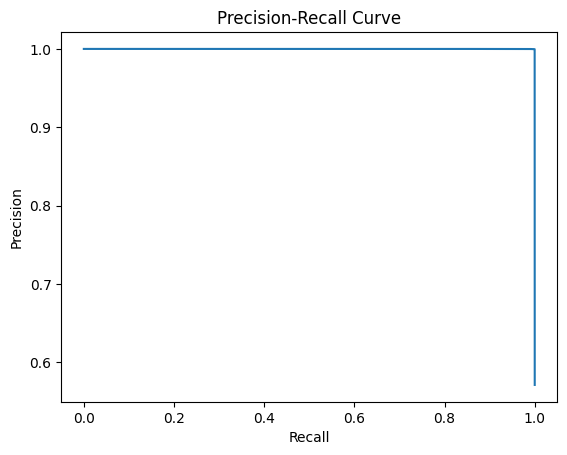

In [24]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

### Top 10 Most Important Features for Using Linear SVM

The plot visualizes the top 10 most important features in detecting phishing URLs using a Linear SVM model. These features are ranked based on the magnitude of their coefficients, indicating their influence on the model's decision-making.

Top 10 Features and Their Coefficients:
URLSimilarityIndex: 367.0570770125403
NoOfSelfRef: 137.95610006860227
NoOfImage: 114.23779994928596
NoOfExternalRef: 101.31058131671178
NoOfJS: 81.90238252687116
NoOfCSS: 60.53801279934487
URLLength: 51.62477499960863
NoOfLettersInURL: 49.30963533254915
LineOfCode: 30.705185002001578
NoOfDegitsInURL: 25.3


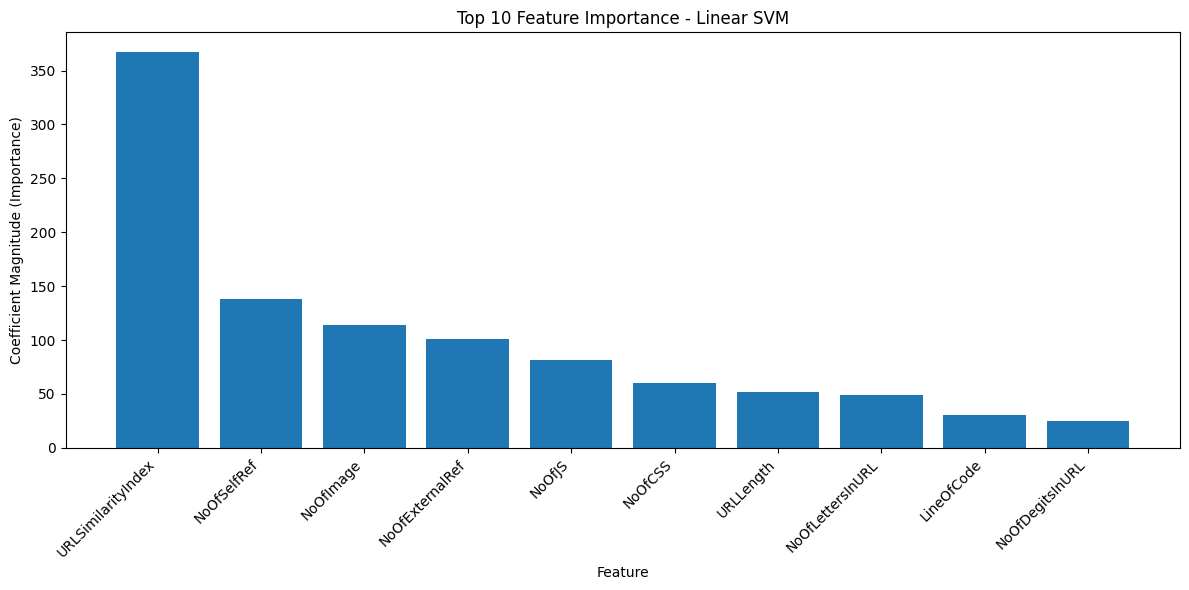

In [34]:
# Define feature names
feature_names = [
    "URLLength", "Domain", "DomainLength", "IsDomainIP", "TLD", "URLSimilarityIndex",
    "CharContinuationRate", "TLDLegitimateProb", "URLCharProb", "TLDLength", 
    "NoOfSubDomain", "HasObfuscation", "NoOfObfuscatedChar", "ObfuscationRatio", 
    "NoOfLettersInURL", "LetterRatioInURL", "NoOfDegitsInURL", "DegitRatioInURL", 
    "NoOfEqualsInURL", "NoOfQMarkInURL", "NoOfAmpersandInURL", 
    "NoOfOtherSpecialCharsInURL", "SpacialCharRatioInURL", "IsHTTPS", "LineOfCode", 
    "LargestLineLength", "HasTitle", "Title", "DomainTitleMatchScore", 
    "URLTitleMatchScore", "HasFavicon", "Robots", "IsResponsive", "NoOfURLRedirect", 
    "NoOfSelfRedirect", "HasDescription", "NoOfPopup", "NoOfiFrame", "HasExternalFormSubmit", 
    "HasSocialNet", "HasSubmitButton", "HasHiddenFields", "HasPasswordField", "Bank", 
    "Pay", "Crypto", "HasCopyrightInfo", "NoOfImage", "NoOfCSS", "NoOfJS", "NoOfSelfRef", 
    "NoOfEmptyRef", "NoOfExternalRef"
]
# Get the absolute values of the coefficients (feature importance)
coefficients = np.abs(svm_model.coef_.flatten())

# Sort the coefficients in descending order and get indices for top 10 features
indices = np.argsort(coefficients)[::-1][:10]

# Get the top 10 feature names based on the sorted indices
top_10_feature_names = np.array(feature_names)[indices]

# Get the top 10 coefficients (magnitude)
top_10_coefficients = coefficients[indices]

# Print the top 10 features and their coefficients
print("Top 10 Features and Their Coefficients:")
for i in range(10):
    print(f"{top_10_feature_names[i]}: {top_10_coefficients[i]}")

# Plot top 10 feature importance with feature names
plt.figure(figsize=(12, 6))  # Increased figure size for better visibility
plt.title("Top 10 Feature Importance - Linear SVM")
plt.bar(range(10), top_10_coefficients, align="center")

# Rotate feature names on the x-axis for better readability
plt.xticks(range(10), top_10_feature_names, rotation=45, ha="right", fontsize=10)

# Add labels to the axes
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude (Importance)")

# Tight layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()